In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import missingno as msno
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [ ]:
pd.set_option('display.max_columns', None)  # Permet d'afficher toutes les colonnes
pd.set_option('display.max_rows', None)   # Permet d'afficher toutes les lignes

In [ ]:
data_original = pd.read_csv("/content/drive/MyDrive/2016_Building_Energy_Benchmarking.csv", sep = ",")

In [ ]:
data = data_original.copy()

**Analyse préliminaire du dataset**

In [ ]:
data.shape

In [ ]:
data.dtypes

Description des colonnes : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

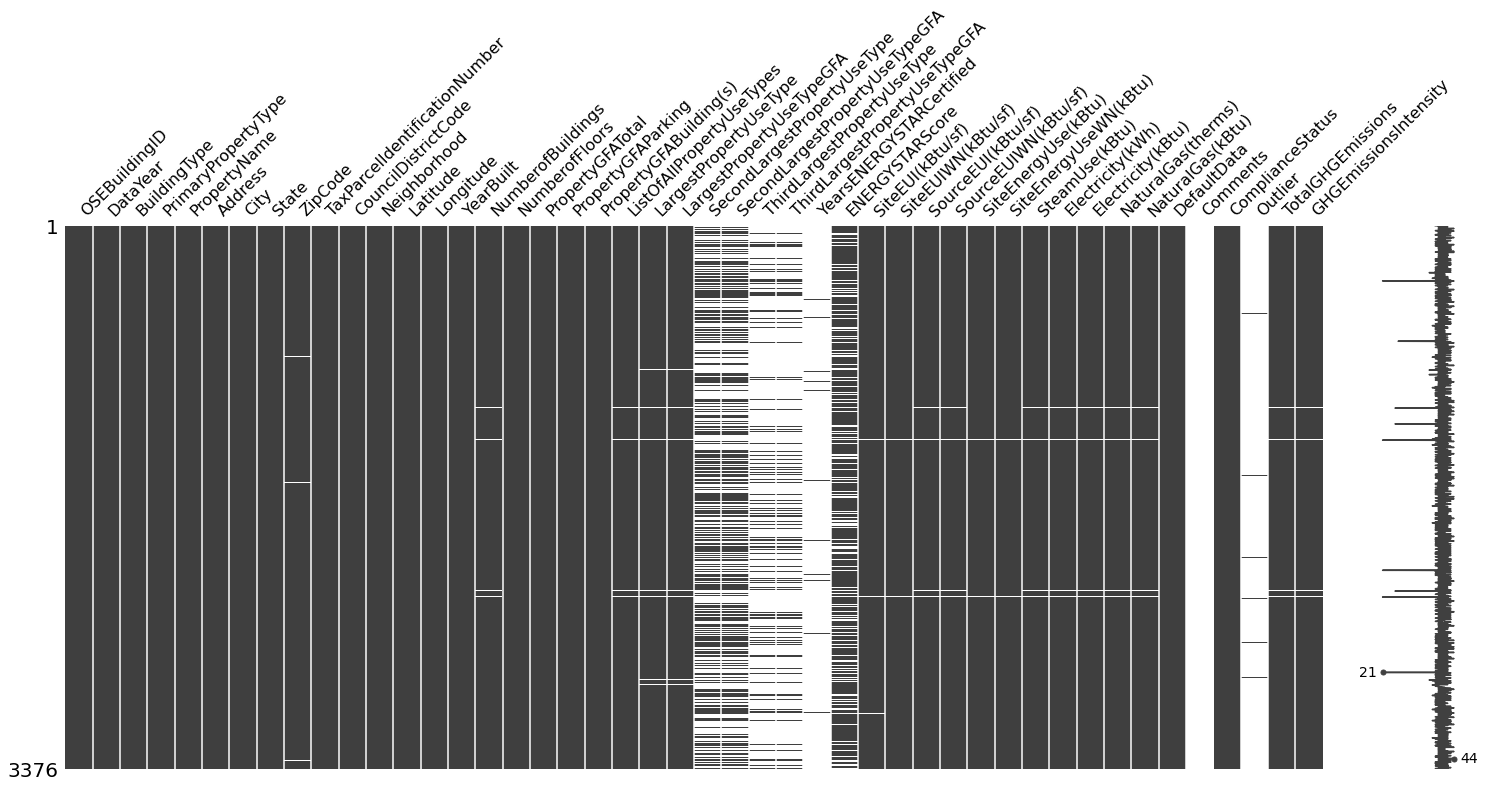

In [ ]:
msno.matrix(data.sample(3376))

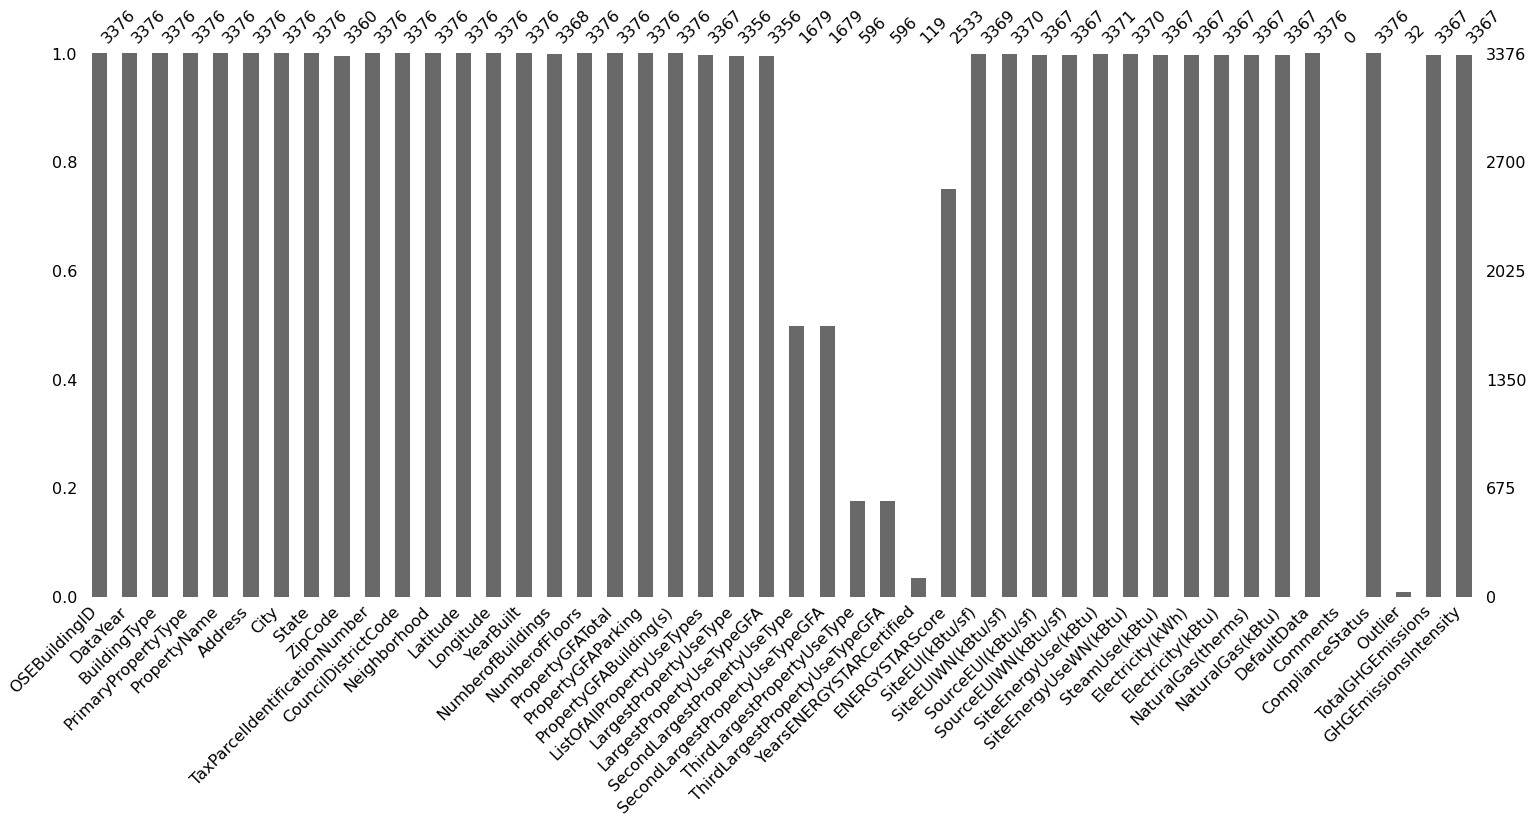

In [ ]:
msno.bar(data.sample(3376))

In [ ]:
a = []
b = []
c = []
d = []                                     

for columns in data.columns : 
  a.append(columns)
  b.append(data[columns].notna().mean() *100)
  c.append(len(data[columns].unique()))
  d.append(data[columns].dtype)

data_quality = DataFrame(data = a, columns = ["Nom colonne"]) 
data_quality["% remplie"] = b   
data_quality["Nombre de valeurs uniques"] = c 
data_quality["Type de la colonne"] = d                          

data_quality

,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,OSEBuildingID,100.000000,3376,int64
1,DataYear,100.000000,1,int64
2,BuildingType,100.000000,8,object
3,PrimaryPropertyType,100.000000,24,object
4,PropertyName,100.000000,3362,object
5,Address,100.000000,3354,object
6,City,100.000000,1,object
7,State,100.000000,1,object
8,ZipCode,99.526066,56,float64
9,TaxParcelIdentificationNumber,100.000000,3268,object


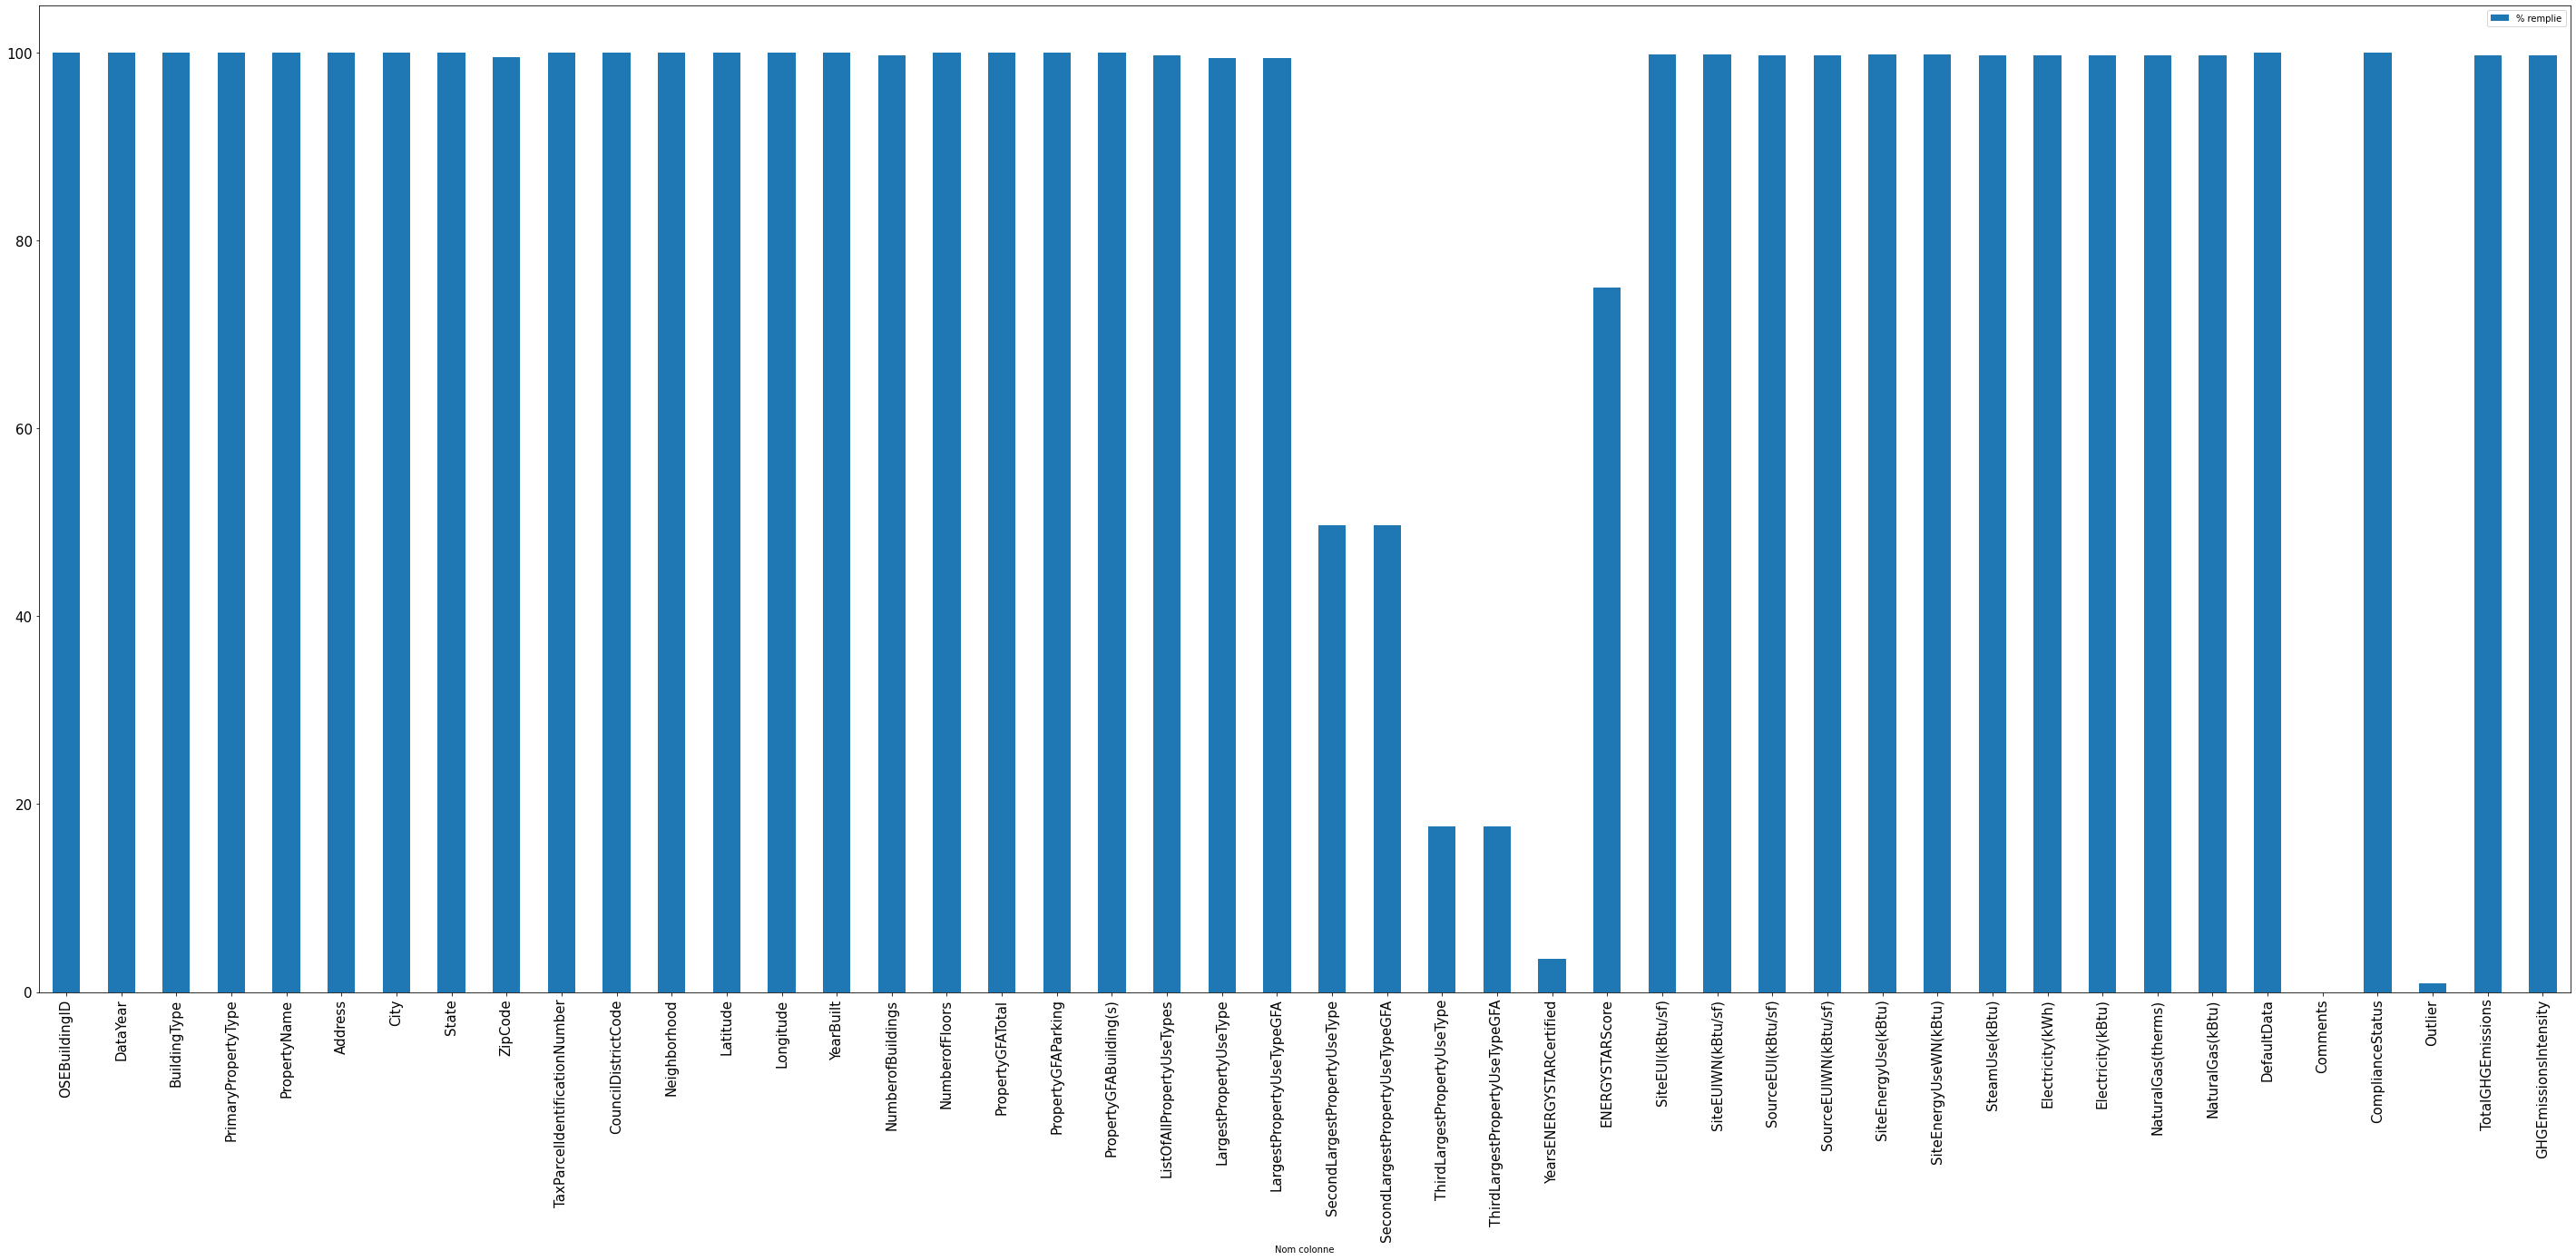

In [ ]:
data_quality.plot(kind='bar', x ="Nom colonne", y = "% remplie", fontsize=15, figsize=(50, 20))

In [ ]:
data.head()

**Suppression de colonnes inutiles / redondantes / inutilisables**

In [ ]:
data = data.drop(columns=['DataYear','City','State','Comments','YearsENERGYSTARCertified'])

Justification pour la suppression :
  - DataYear est 2016
  - City est Seattle
  - State est WE (Etat de Washington)
  - Comments est entièrement vide
  - YearsENERGYSTARCertified est trop peu remplie pour être utilisable

Parmi les 3376 bâtiments de notre dataframe, et grâce à la colonne "Outlier", on remarque que 32 bâtiments (~1%) sont considérés comme outliers (low ou high).
Par la nature du travail de prédiction et de modélisation à venir, il semble pertinent de ne pas prendre en compte ces bâtiments.

In [ ]:
data.loc[data["Outlier"].notna()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,98101.0,0942000045,7,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,297.399994,299.200012,909.599976,911.500000,4.139950e+07,4.165040e+07,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,Non-Compliant,High outlier,362.66,2.10
384,539,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,98105.0,5335200380,4,NORTHEAST,47.66178,-122.31812,1987,1.0,2,69492,0,69492,Retail Store,Retail Store,69800.0,Other,0.0,NaN,NaN,100.0,4.600000,4.600000,14.300000,14.300000,3.189628e+05,3.189628e+05,0.0,9.348260e+04,318963.0,0.000000,0.0,False,Non-Compliant,Low outlier,2.22,0.03
448,608,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,98104.0,5247800200,2,DOWNTOWN,47.59878,-122.33458,1913,5.0,7,154159,0,154159,Office,Office,193154.0,NaN,NaN,NaN,NaN,100.0,58.000000,58.799999,28.000000,28.700001,1.119592e+07,1.134876e+07,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,False,Non-Compliant,Low outlier,29.43,0.19
517,704,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,2000,1.0,4,129551,42500,87051,"Data Center, Office, Parking",Office,82273.0,Parking,42500.0,Data Center,4778.0,1.0,311.700012,311.700012,978.900024,978.900024,2.713719e+07,2.713719e+07,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,Non-Compliant,High outlier,189.18,1.46
720,19708,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,98121.0,0586400000,7,DOWNTOWN,47.61706,-122.35141,1982,1.0,24,167941,0,167941,"Multifamily Housing, Swimming Pool",Multifamily Housing,138787.0,Parking,99952.0,Swimming Pool,0.0,100.0,17.299999,18.700001,50.400002,54.000000,2.407904e+06,2.589126e+06,0.0,6.265616e+05,2137828.0,2700.760010,270076.0,False,Non-Compliant,Low outlier,29.25,0.17
834,19934,Multifamily LR (1-4),Low-Rise Multifamily,Belmont Lofts,231 Belmont Ave E,98102.0,0704600000,3,EAST,47.62059,-122.32440,1989,1.0,4,31702,0,31702,"Multifamily Housing, Parking",Multifamily Housing,26418.0,Parking,14280.0,NaN,NaN,NaN,9.700000,10.400000,30.400000,32.700001,2.559712e+05,2.754120e+05,0.0,7.502090e+04,255971.0,0.000000,0.0,False,Non-Compliant,Low outlier,1.78,0.06
839,19967,SPS-District K-12,K-12 School,Queen Anne Gym,1431 2nd Ave N,98109.0,0811000005,7,MAGNOLIA / QUEEN ANNE,47.63203,-122.35337,2001,1.0,1,35805,0,35805,K-12 School,K-12 School,35805.0,NaN,NaN,NaN,NaN,100.0,12.100000,12.100000,27.000000,27.000000,4.314717e+05,4.314717e+05,0.0,7.228240e+04,246628.0,1848.439575,184844.0,True,Error - Correct Default Data,Low outlier,11.54,0.32
962,20367,Multifamily LR (1-4),Low-Rise Multifamily,City Lights on Harbor,2349 Harbor Ave. SW,98126.0,1595200000,1,SOUTHWEST,47.58143,-122.37510,1990,1.0,3,70207,0,70207,Multifamily Housing,Multifamily Housing,71273.0,NaN,NaN,NaN,NaN,100.0,9.900000,9.900000,30.900000,30.900000,7.024814e+05,7.024814e+05,0.0,2.058855e+05,702481.0,0.000000,0.0,False,Non-Compliant,Low outlier,4.90,0.07
1045,20617,NonResidential,Retail Store,Seattle Habitat Store,21 S Nevada St,98134.0,1824049074,2,GREATER DUWAMISH,47.56535,-122.34054,1953,1.0,

In [ ]:
print("Avant modification :", data.shape[0], "lignes.")
a = data.shape[0]


subset = data.loc[data["Outlier"].notna()]
data = data.drop(subset.index)


print("Après modification :", data.shape[0], "lignes.")
b = data.shape[0]
c = a - b
d = c / a * 100
print(c, "lignes ont été supprimées, soit", d, "% des données.")

Avant modification : 3376 lignes.
Après modification : 3344 lignes.
32 lignes ont été supprimées, soit 0.9478672985781991 % des données.


On peut ensuite supprimer la colonne Outlier qui est maintenant vide.

In [ ]:
data = data.drop(columns=['Outlier'])

In [ ]:
data_quality.loc[data_quality["% remplie"] < 100]

,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
8,ZipCode,99.526066,56,float64
15,NumberofBuildings,99.763033,18,float64
20,ListOfAllPropertyUseTypes,99.733412,467,object
21,LargestPropertyUseType,99.407583,57,object
22,LargestPropertyUseTypeGFA,99.407583,3123,float64
23,SecondLargestPropertyUseType,49.733412,51,object
24,SecondLargestPropertyUseTypeGFA,49.733412,1353,float64
25,ThirdLargestPropertyUseType,17.654028,45,object
26,ThirdLargestPropertyUseTypeGFA,17.654028,502,float64
27,YearsENERGYSTARCertified,3.524882,66,object


Zipcodes manquants

In [ ]:
data.loc[data["ZipCode"].isna()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3360,50196,Nonresidential COS,Mixed Use Property,Northgate Community Center,10510 5th Ave NE,NaN,2926049431,5,NORTH,47.70541,-122.32232,2005,1.0,1,20616,0,20616,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,9900.0,Fitness Center/Health Club/Gym,8577.0,Pre-school/Daycare,1364.0,NaN,30.900000,30.900000,97.000000,97.000000,6.369655e+05,6.369655e+05,0.0,186683.90630,6.369655e+05,0.000000,0.000000e+00,False,Compliant,4.44,0.22
3361,50198,Nonresidential COS,Other,Fire Station 06 (New),405 MLK Jr Way S,NaN,1250200565,3,CENTRAL,47.59905,-122.29787,2013,1.0,1,11685,0,11685,Prison/Incarceration,Prison/Incarceration,11685.0,NaN,NaN,NaN,NaN,NaN,72.800003,82.900002,138.600006,149.199997,8.510538e+05,9.691420e+05,0.0,101784.50000,3.472887e+05,5037.649902,5.037650e+05,False,Compliant,29.18,2.50
3362,50201,Nonresidential COS,Other,Fire Station 35 (New),8729 15th Ave NW,NaN,3300700810,6,BALLARD,47.69330,-122.37717,2010,1.0,1,11968,0,11968,Prison/Incarceration,Prison/Incarceration,11968.0,NaN,NaN,NaN,NaN,NaN,65.500000,71.800003,139.199997,149.000000,7.834230e+05,8.587730e+05,0.0,118183.79690,4.032431e+05,3801.799805,3.801800e+05,False,Compliant,23.00,1.92
3363,50204,Nonresidential COS,Other,Fire Station 39 (New),2806 NE 127th St,NaN,3834500066,5,NORTH,47.72126,-122.29735,1949,1.0,1,11285,0,11285,Prison/Incarceration,Prison/Incarceration,11285.0,NaN,NaN,NaN,NaN,NaN,57.200001,62.599998,140.000000,148.399994,6.456654e+05,7.059837e+05,0.0,126552.00000,4.317954e+05,2138.700195,2.138700e+05,False,Compliant,14.37,1.27
3364,50207,Nonresidential COS,Other,Ballard Community Center,6020 28th ave NW,NaN,6658000065,6,BALLARD,47.67295,-122.39228,1911,1.0,1,16795,0,16795,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,8680.0,Fitness Center/Health Club/Gym,7014.0,Pre-school/Daycare,535.0,NaN,55.799999,59.000000,126.000000,129.399994,9.366165e+05,9.905455e+05,0.0,158890.50000,5.421344e+05,3944.819824,3.944820e+05,False,Compliant,24.73,1.47
3365,50208,Nonresidential COS,Other,Ballard Pool,1471 NW 67th St,NaN,3050700005,6,BALLARD,47.67734,-122.37624,1972,1.0,1,12769,0,12769,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,10912.0,Fitness Center/Health Club/Gym,1670.0,Office,187.0,NaN,400.799988,420.600006,618.099976,638.900024,5.117308e+06,5.370264e+06,0.0,353216.09380,1.205173e+06,39121.351560,3.912135e+06,False,Compliant,216.18,16.93
3366,50210,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,NaN,2425039137,7,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,1,13661,0,13661,Office,Office,13661.0,NaN,NaN,NaN,NaN,75.0,36.799999,40.900002,115.500000,128.399994,5.026677e+05,5.585251e+05,0.0,147323.50000,5.026678e+05,0.000000,0.000000e+00,True,Error - Correct Default Data,3.50,0.26
3367,50212,Nonresidential COS,Other,Conservatory Campus,1400 E Galer St,NaN,2925049087,3,EAST,47.63228,-122.31574,1912,1.0,1,23445,0,23445,Other - Recreation,Other - Recreation,23445.0,NaN,NaN,NaN,NaN,NaN,254.899994,286.500000,380.100006,413.200012,5.976246e+06,6.716330e+06,0.0,369539.81250,1.260870e+06,47153.757810,4.715376e+06,False,Compliant,259.22,11.06
3368,50219,Nonresidential COS,Mixed Use Property,Garfield Community Center,2323 East Cherry St,NaN,7544800245,3,CEN

Les codes postaux manquants sont facilement retrouvables grâce à l'adresse :

In [ ]:
data.at[3360, 'ZipCode'] = '98125'
data.at[3361, 'ZipCode'] = '98144'
data.at[3362, 'ZipCode'] = '98117'
data.at[3363, 'ZipCode'] = '98125'
data.at[3364, 'ZipCode'] = '98107'
data.at[3365, 'ZipCode'] = '98117'
data.at[3366, 'ZipCode'] = '98119'
data.at[3367, 'ZipCode'] = '98112'
data.at[3368, 'ZipCode'] = '98122'
data.at[3369, 'ZipCode'] = '98118'
data.at[3370, 'ZipCode'] = '98126'
data.at[3371, 'ZipCode'] = '98108'
data.at[3372, 'ZipCode'] = '98104'
data.at[3373, 'ZipCode'] = '98119'
data.at[3374, 'ZipCode'] = '98108'
data.at[3375, 'ZipCode'] = '98108'

NumberofBuildings et LargestPropertyUseType	manquants :

In [ ]:
data.loc[data["NumberofBuildings"].isna()]

In [ ]:
data.loc[data["LargestPropertyUseType"].isna()]

In [ ]:
print("Avant modification :", data.shape[0], "lignes.")
a = data.shape[0]


subset = data.loc[data['ListOfAllPropertyUseTypes'].isna()]
data = data.drop(subset.index)

subset = data.loc[data['LargestPropertyUseType'].isna()]
data = data.drop(subset.index)


print("Après modification :", data.shape[0], "lignes.")
b = data.shape[0]
c = a - b
d = c / a * 100
print(c, "lignes ont été supprimées, soit", d, "% des données.")

Avant modification : 3344 lignes.
Après modification : 3324 lignes.
20 lignes ont été supprimées, soit 0.5980861244019139 % des données.


SiteEUI(kBtu/sf) et SiteEUIWN(kBtu/sf)	manquants :

In [ ]:
data.loc[data["SiteEUI(kBtu/sf)"].isna()]

In [ ]:
data.loc[data['SiteEUIWN(kBtu/sf)'].isna()]

In [ ]:
print("Avant modification :", data.shape[0], "lignes.")
a = data.shape[0]


subset = data.loc[data['SiteEUI(kBtu/sf)'].isna()]
data = data.drop(subset.index)

subset = data.loc[data['SiteEUIWN(kBtu/sf)'].isna()]
data = data.drop(subset.index)



print("Après modification :", data.shape[0], "lignes.")
b = data.shape[0]
c = a - b
d = c / a * 100
print(c, "lignes ont été supprimées, soit", d, "% des données.")

Avant modification : 3324 lignes.
Après modification : 3321 lignes.
3 lignes ont été supprimées, soit 0.09025270758122744 % des données.


In [ ]:
a = []
b = []
c = []
d = []                                     

for columns in data.columns : 
  a.append(columns)
  b.append(data[columns].notna().mean() *100)
  c.append(len(data[columns].unique()))
  d.append(data[columns].dtype)

data_quality = DataFrame(data = a, columns = ["Nom colonne"]) 
data_quality["% remplie"] = b   
data_quality["Nombre de valeurs uniques"] = c 
data_quality["Type de la colonne"] = d    

data_quality

,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,OSEBuildingID,100.000000,3321,int64
1,BuildingType,100.000000,8,object
2,PrimaryPropertyType,100.000000,24,object
3,PropertyName,100.000000,3307,object
4,Address,100.000000,3299,object
5,ZipCode,100.000000,55,float64
6,TaxParcelIdentificationNumber,100.000000,3215,object
7,CouncilDistrictCode,100.000000,7,int64
8,Neighborhood,100.000000,19,object
9,Latitude,100.000000,2840,float64


In [ ]:
print("Nombre de lignes (dataframe d'origine) :", data_original.shape[0], "lignes.")
a = data_original.shape[0]

print("Nombre de lignes (dataframe nettoyé)   :", data.shape[0], "lignes.")
b = data.shape[0]
c = a - b
d = c / a * 100

print(" ")
print("En tout,", c, "lignes ont été supprimées, soit", d, "% des données d'origine.")

Nombre de lignes (dataframe d'origine) : 3376 lignes.
Nombre de lignes (dataframe nettoyé)   : 3321 lignes.
 
En tout, 55 lignes ont été supprimées, soit 1.6291469194312798 % des données d'origine.


**Normalisation** de la colonne Neighborhood

In [ ]:
data["Neighborhood"].value_counts()

In [ ]:
data["Neighborhood"] = data["Neighborhood"].str.upper()

In [ ]:
data.loc[data["Neighborhood"] == "DELRIDGE NEIGHBORHOODS"]

In [ ]:
data.at[3370, 'Neighborhood'] = 'DELRIDGE'

In [ ]:
data["Neighborhood"].value_counts()

**Suppression des bâtiments destinés à l'habitation**

Notre étude et future modélisation ne concerne que les bâtiments non-destinés à l'habitation ! Il faut donc les exclure afin de ne pas fausser les résultats.

In [ ]:
data["BuildingType"].value_counts()

In [ ]:
print("Avant modification :", data.shape[0], "lignes.")
a = data.shape[0]

categories_a_supprimer = ["Multifamily LR (1-4)", "Multifamily MR (5-9)", "Multifamily HR (10+)"]
data = data.drop(data.loc[data["BuildingType"].isin(categories_a_supprimer)].index)


print("Après modification :", data.shape[0], "lignes.")
b = data.shape[0]
c = a - b
d = c / a * 100
print(c, "lignes ont été supprimées, soit", d, "% des données.")

Avant modification : 3321 lignes.
Après modification : 1643 lignes.
1678 lignes ont été supprimées, soit 50.52694971394158 % des données.


In [ ]:
data["LargestPropertyUseType"].value_counts()

In [ ]:
print("Avant modification :", data.shape[0], "lignes.")
a = data.shape[0]

categories_a_supprimer = ["Multifamily Housing"]
data = data.drop(data.loc[data["LargestPropertyUseType"].isin(categories_a_supprimer)].index)

print("Après modification :", data.shape[0], "lignes.")
b = data.shape[0]
c = a - b
d = c / a * 100
print(c, "lignes ont été supprimées, soit", d, "% des données.")

Avant modification : 1643 lignes.
Après modification : 1632 lignes.
11 lignes ont été supprimées, soit 0.6695069993913573 % des données.


In [ ]:
data["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    287
Other                          246
Warehouse                      187
Large Office                   169
K-12 School                    137
Mixed Use Property             104
Retail Store                    89
Hotel                           74
Worship Facility                69
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           27
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

Ajout de trois colonnes : BuildingAge (âge du bâtiment), ParkingPercent (Pourcentage du bâtiment qui est un parking), et HasParking (si le bâtiment possède un parking)

In [ ]:
data["BuildingAge"] = 2022 - data.YearBuilt

In [ ]:
data["ParkingPercent"] = ( data.PropertyGFAParking / data.PropertyGFATotal ) * 100

In [ ]:
data["HasParking"] = "yes"
data.loc[data["PropertyGFAParking"] == 0, "HasParking"] = "no"

In [ ]:
data.head()

Exportation du dataframe nettoyé.

In [ ]:
data.to_csv('data_projet4_clean.csv', sep = ",")

Outliers (IQR)

__________________________________
Colonne : PropertyGFATotal
Boxplot avant détection des outliers :


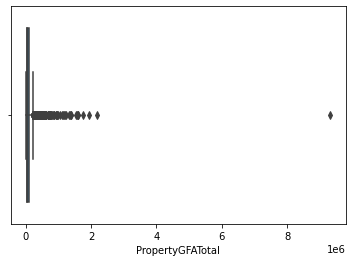

La valeur de q1 est: 29505.5
La valeur de q3 est: 106010.25
La valeur de l'iqr est: 76504.75
La valeur de la limite supérieure est : -85252
La valeur de la limite inférieure est : 220767
Boxplot après détection des outliers :


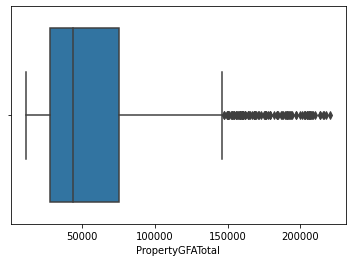

Avant modification : 1632 lignes.
Après modification : 1432 lignes.
200 lignes ont été supprimées, soit 12.254901960784313 % des données.
 
__________________________________
Colonne : SiteEnergyUse(kBtu)
Boxplot avant détection des outliers :


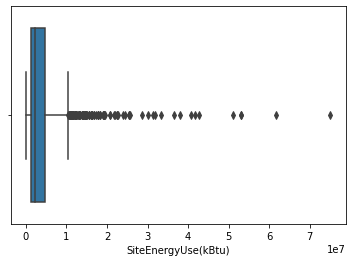

La valeur de q1 est: 1131412.0
La valeur de q3 est: 4805369.5
La valeur de l'iqr est: 3673957.5
La valeur de la limite supérieure est : -4379524
La valeur de la limite inférieure est : 10316306
Boxplot après détection des outliers :


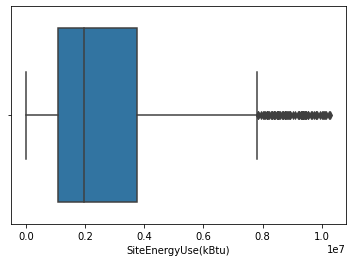

Avant modification : 1432 lignes.
Après modification : 1325 lignes.
107 lignes ont été supprimées, soit 7.472067039106145 % des données.
 
__________________________________
Colonne : TotalGHGEmissions
Boxplot avant détection des outliers :


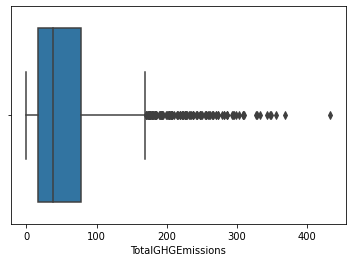

La valeur de q1 est: 16.13
La valeur de q3 est: 77.8
La valeur de l'iqr est: 61.67
La valeur de la limite supérieure est : -76
La valeur de la limite inférieure est : 170
Boxplot après détection des outliers :


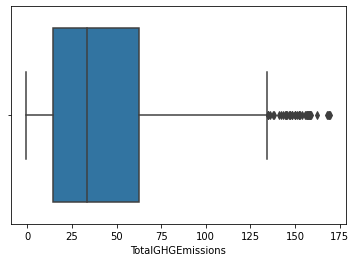

Avant modification : 1325 lignes.
Après modification : 1202 lignes.
123 lignes ont été supprimées, soit 9.283018867924527 % des données.
 


In [ ]:
colonnes_outliers = ["PropertyGFATotal","SiteEnergyUse(kBtu)","TotalGHGEmissions"]

for colonne in colonnes_outliers :

  print("__________________________________")
  print("Colonne :", str(colonne))
  print("Boxplot avant détection des outliers :")
  sns.boxplot(x=colonne, data=data)
  plt.show()

  sorts = data[colonne].sort_values()

  q1 = sorts.quantile(0.25)
  q3 = sorts.quantile(0.75)
  print("La valeur de q1 est:", q1)
  print("La valeur de q3 est:", q3)

  iqr = q3 - q1
  print("La valeur de l'iqr est:", iqr)

  upper = q1-1.5*iqr
  lower = q3+1.5*iqr

  print("La valeur de la limite supérieure est :", round(upper))
  print("La valeur de la limite inférieure est :", round(lower))

  clean_data = sorts[~((sorts < (upper)) | (sorts > (lower)))]

  print("Boxplot après détection des outliers :")
  sns.boxplot(x = clean_data)
  plt.show()

  print("Avant modification :", data.shape[0], "lignes.")
  a = data.shape[0]

  data = data.loc[clean_data.index]

  print("Après modification :", data.shape[0], "lignes.")
  b = data.shape[0]

  c = a - b
  d = c / a * 100
  print(c, "lignes ont été supprimées, soit", d, "% des données.")
  print(" ")

In [ ]:
data.to_csv('data_projet4_clean_no_outliers.csv', sep = ",")